In [ ]:
%matplotlib inline  
import pandas as pd #data manipulation
import numpy as np #numerical calculations
import matplotlib.pyplot as plt #plot
import yfinance as yf  #幫我們抓取分析資料
import datetime#時間套件
pd.options.mode.chained_assignment = None  # default='warn' 
#安裝套件指令
#!pip install yfinance 
#!pip install datetime  

##自由發揮題：技術分析 - RSI 指標

* 目的：希望藉由此程式幫助我們對標的進行技術分析，本程式將以RSI(相對強弱指標)指標為例。

* 技術指標類型：RSI(相對強弱指標)
* RSI指標說明：技術分析中，最常被投資人使用的指標有三：KD、RSI、MACD，其中RSI指標，是一種以股價漲跌為基礎並可以幫助投資人判斷股價強弱的指標。天數為參數，可以自己定義。RSI值越大，表示此檔股票在某段期間，漲勢熱絡；相反的，RSI值越小，表示此檔股票在某段期間，股價常處於比較低迷的狀態。  

* 標的：使用者可自行輸入，我們先以台積電(2330.TW)為例。

* 資料區間：2020/01/01-2022/01/01  
* 資料來源：Yahoo Finance

* 撰寫思路：  
首先，我們先運用Yahoo Finance抓取股價資料。  
再來，計算RSI指標。  
最後，將收盤價格與RSI指標繪製成同一張圖，方便我們對照判斷。  
 


In [ ]:
ticker = str(input("請輸入要分析標的的股票代號："))
days = int(input('請輸入天數：'))
#ticker = '2330.TW'
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 1, 1)

#get data
data = yf.download(ticker,start=start , end=end)

#daily return
daily_return = data['Adj Close'].diff(1)
data.dropna(inplace=True)

positive = daily_return.copy()
negative = daily_return.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0



請輸入要分析標的的股票代號：2330.TW
請輸入天數：14
[*********************100%***********************]  1 of 1 completed


* RSI計算公式：RSI=100-100÷(1+RS)。 其中，RS=14天內收市價上漲數之和的平均值/14天內收市價下跌數之和的平均值。
* RSI是計算過去一段時間的相對強弱，這個"一段時間"是看個人選擇要多長的時間，一般比較常見的是6日、12日、14日、24日，這個沒有一定要哪個日期比較好，這邊我們就先用14日來做計算。

In [ ]:
#Moving Average
average_gain = positive.rolling(window = days).mean()
average_loss = abs(negative.rolling(window = days).mean()) #add abs() 

relative_strength = average_gain / average_loss 
RSI = 100 - (100/(1 + relative_strength))

#Combine Adj Close and RSI
combine = pd.DataFrame()
combine['Adj Close'] = data['Adj Close']
combine['RSI'] = RSI

### 繪圖

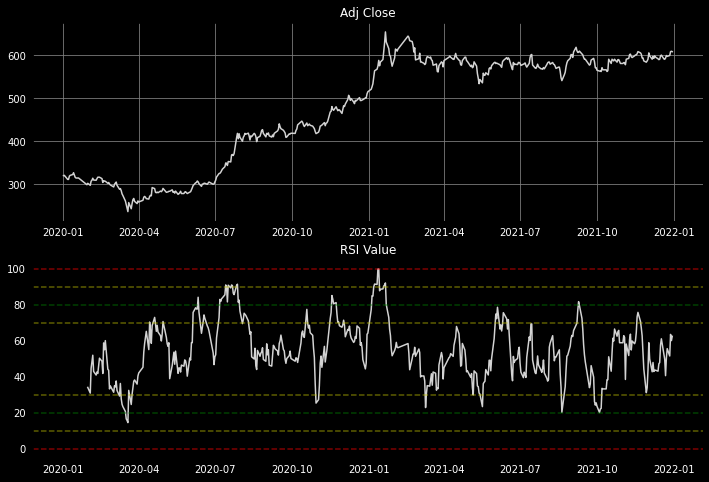

In [ ]:
#Plot the close price 
plt.figure(figsize=(12,8))  
ax1 = plt.subplot(211) #繪製子圖 212 表示大圖含有2行1列共2個子圖，正在繪製的是第一個。
ax1.plot(combine.index,combine['Adj Close'], color = 'lightgray')
ax1.set_title('Adj Close', color='white')

ax1.grid(True,color='grey') #網格線
ax1.set_axisbelow(True) #設置軸刻度和網格線是高於還是低於圖
ax1.set_facecolor('black') #設定繪圖背景顏色 #小圖
ax1.figure.set_facecolor('black') #大背景
ax1.tick_params(axis='x',labelcolor='white') #tick_params參數刻度線樣式設置 字型顏色
ax1.tick_params(axis='y',labelcolor='white')

#plot the RSI
ax2 = plt.subplot(212,sharex=ax1) #第二塊子圖
ax2.plot(combine.index,combine['RSI'],color='lightgray')
#set RSI barrier
ax2.axhline(0, linestyle='--',alpha=0.5, color='r') #axhline 畫水平線
ax2.axhline(10, linestyle='--',alpha=0.5, color='y')
ax2.axhline(20, linestyle='--',alpha=0.5, color='g')
ax2.axhline(30, linestyle='--',alpha=0.5, color='y')
ax2.axhline(70, linestyle='--',alpha=0.5, color='y')
ax2.axhline(80, linestyle='--',alpha=0.5, color='g')
ax2.axhline(90, linestyle='--',alpha=0.5, color='y')
ax2.axhline(100, linestyle='--',alpha=0.5, color='r')

ax2.set_title('RSI Value', color='white')
ax2.grid(False)  
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x',labelcolor='white') 
ax2.tick_params(axis='y',labelcolor='white')
plt.show()

### RSI指標的應用 - 判斷市場超買和超賣
* 超買：RSI值在70到100之間通常被認定為超買區，此時代表市場可能上漲過快，可尋找機會賣出。
* 超賣：RSI 值在0到30間通常被認定為超賣區，此時代表市場可能下跌過快，可尋找機會買進。
* 想對RSI指標有更多了解，可參考以下幾篇文章：http://www.yunfar.com.tw/E-learning/RSI.html 、http://www.sharecloud.tw/2018/07/Technical-Indicators-4-RSI.html
